In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing Datasets (all)
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv', index_col='Id')
weather = pd.read_csv('../assets/weather.csv')
spray = pd.read_csv('../assets/spray.csv')

In [78]:
# show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Defined Functions

In [3]:
def eda(dataframe):
    """Runs basic EDA on dataframe."""
    print("dataframe shape \n", dataframe.shape, '\n')
    print("dataframe types \n", dataframe.dtypes, '\n')
    print("dataframe describe \n", dataframe.describe(), '\n')
    print("dataframe describe \n", dataframe.describe(exclude=np.number).T, '\n')
    print("missing values \n", dataframe.isnull().sum(), '\n')
    print("duplicate values \n", dataframe.duplicated().sum(), '\n')
    print("dataframe columns \n", dataframe.columns, '\n')
    
    #check if column is unique
    for i in dataframe.columns:
        print('{} is unique: {}'.format(i, dataframe[i].is_unique))

In [4]:
def split_date (data):
    """split into year and month"""
    data['year'] = data.date.dt.year
    data['month'] = data.date.dt.month
    return

## <span style='background :yellow' > Train and Test Dataset </span>

##### Notes: 
- train set has 12 columns, test set has 10 columns. 'NumMosquitos' and 'WnvPresent' not found in test set
- 'WnvPresent' is our target column. 
- train has 10506 rows, test set has 116293 rows. 
- no nulls in both


There is no mosquito information so our predictions have to be based on weather, location, time, and spraying
.. to add on later

In [5]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
test.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
Id,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [7]:
eda(train)

dataframe shape 
 (10506, 12) 

dataframe types 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

dataframe describe 
               Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.95

In [8]:
eda(test)

dataframe shape 
 (116293, 10) 

dataframe types 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object 

dataframe describe 
                Block       Latitude      Longitude  AddressAccuracy
count  116293.000000  116293.000000  116293.000000    116293.000000
mean       41.131100      41.849389     -87.693658         7.954357
std        24.864726       0.106593       0.080699         1.252733
min        10.000000      41.644612     -87.930995         3.000000
25%        18.000000      41.753411     -87.750938         8.000000
50%        39.000000      41.862292     -87.694991         8.000000
75%        61.000000      41.951866     -87.648860         9.000000
max        98.000000      42

## <span style='background :yellow' > Weather Dataset </span>
- Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
- Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [79]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2,2007,5
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6,2007,5
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4,2007,5
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4,2007,5
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9,2007,5


In [10]:
eda(weather)

dataframe shape 
 (2944, 22) 

dataframe types 
 Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object 

dataframe describe 
            Station         Tmax         Tmin     DewPoint  ResultSpeed  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean      1.500000    76.166101    57.810462    53.457880     6.960666   
std       0.500085    11.461970    10.381939    10.675181     3.587527   
min       1.000000    41.000000    29.000000    22.000000     0.100000   
25%       1.000000    69.000000    50.

##### Even though data showed that there is no null value, there were missing values as it is stated as M or - Hence checking columns with object dtype that most likely are suppose to be int

In [11]:
check_col = ['Tavg', 'Depart','WetBulb','Heat','Cool',
             'Sunrise','Sunset','Depth','Water1','SnowFall',
            'PrecipTotal','StnPressure','SeaLevel','AvgSpeed']

print(weather.shape)
print('')

for col in weather[check_col]:
    station_1 = len(weather[(weather[col].str.contains('\D')) & (weather['Station']==1)])
    print(f"{col}(station 1): {str(station_1)} missing values")
    
    station_2 = len(weather[(weather[col].str.contains('\D')) & (weather['Station']==2)])
    print(f"{col}(station 2): {str(station_2)} missing values")
    print('**************')

(2944, 22)

Tavg(station 1): 0 missing values
Tavg(station 2): 11 missing values
**************
Depart(station 1): 1271 missing values
Depart(station 2): 1472 missing values
**************
WetBulb(station 1): 3 missing values
WetBulb(station 2): 1 missing values
**************
Heat(station 1): 0 missing values
Heat(station 2): 11 missing values
**************
Cool(station 1): 1096 missing values
Cool(station 2): 1021 missing values
**************
Sunrise(station 1): 0 missing values
Sunrise(station 2): 1472 missing values
**************
Sunset(station 1): 0 missing values
Sunset(station 2): 1472 missing values
**************
Depth(station 1): 0 missing values
Depth(station 2): 1472 missing values
**************
Water1(station 1): 1472 missing values
Water1(station 2): 1472 missing values
**************
SnowFall(station 1): 1472 missing values
SnowFall(station 2): 1472 missing values
**************
PrecipTotal(station 1): 1472 missing values
PrecipTotal(station 2): 1472 missing values
*

##### Most missing values appear to be from station 2

In [12]:
# Drop data from station 2? 
# imputate data from station 1 (replace to 0 or avg)

## <span style='background :yellow' > Spray Dataset </span>

In [13]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [14]:
eda(spray)

dataframe shape 
 (14835, 4) 

dataframe types 
 Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object 

dataframe describe 
            Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727 

dataframe describe 
       count unique         top  freq
Date  14835     10  2013-08-15  2668
Time  14251   8583  7:44:32 PM   541 

missing values 
 Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64 

duplicate values 
 541 

dataframe columns 
 Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object') 

Date is unique: False
Time is unique: False
Latitude is unique: False
Longitude is unique: False


In [15]:
# Time is too specific and it's only available in Spray dataset 
# Consider dropping?

## <span style='background :yellow' > Duplicates for Train, Weather, Spray Dataset </span>

In [16]:
print("Original Number rows in Train Dataset: ", len(train))
print("Original Number of post in Weather Dataset: ", len(weather))
print("Original Number of post in Spray Dataset: ", len(spray))
print('')

print("Original Number Duplicates in Train Dataset: ", train.duplicated().sum())
print("Original Number Duplicates in Weather Dataset: ", weather.duplicated().sum())
print("Original Number Duplicates in Spray Dataset: ", spray.duplicated().sum())
print('')

# train.drop_duplicates(inplace = True)
# weather.drop_duplicates(inplace = True)
# spray.drop_duplicates(inplace = True)

# print("Number of rows in train w/o duplicates: ", len(train))
# print("Number of rows in Weather w/o duplicates: ", len(weather))
# print("Number of rows in spray w/o duplicates: ", len(spray))

Original Number rows in Train Dataset:  10506
Original Number of post in Weather Dataset:  2944
Original Number of post in Spray Dataset:  14835

Original Number Duplicates in Train Dataset:  813
Original Number Duplicates in Weather Dataset:  0
Original Number Duplicates in Spray Dataset:  541



##### As stated, test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. Hence, will not be dropping the duplicates

## Edit formats

In [17]:
# Map the lowering function to all column names
train.columns = map(str.lower, train.columns)
test.columns = map(str.lower, test.columns)
weather.columns = map(str.lower, weather.columns)
spray.columns = map(str.lower, spray.columns)

In [18]:
# changes date and time to datetime formats
train['date'] = pd.to_datetime(train['date'], infer_datetime_format=True)
test['date'] = pd.to_datetime(test['date'], infer_datetime_format=True)
weather['date'] = pd.to_datetime(weather['date'], infer_datetime_format=True)
spray['date'] = pd.to_datetime(spray['date'], infer_datetime_format=True)
spray['time'] = pd.to_datetime(spray['time'], infer_datetime_format=True)

In [19]:
# changes time to the hour of the day
spray['time'] = spray['time'].dt.hour

In [20]:
spray.head()


,date,time,latitude,longitude
0,2011-08-29,18.0,42.391623,-88.089163
1,2011-08-29,18.0,42.391348,-88.089163
2,2011-08-29,18.0,42.391022,-88.089157
3,2011-08-29,18.0,42.390637,-88.089158
4,2011-08-29,18.0,42.390410,-88.088858


In [21]:
#let me know if we want to do this makes EDA easier maybe?
# train['Address'] = train['Address'].astype('category')
# train['Species'] = train['Species'].astype('category')
# train['Street'] = train['Street'].astype('category')
# train['Trap'] = train['Trap'].astype('category')
# train['AddressNumberAndStreet'] = train['AddressNumberAndStreet'].astype('category')

## <span style='background :yellow' > EDA</span>

In [22]:
train['species'].value_counts(normalize = True)

CULEX PIPIENS/RESTUANS    0.452313
CULEX RESTUANS            0.260803
CULEX PIPIENS             0.256901
CULEX TERRITANS           0.021131
CULEX SALINARIUS          0.008186
CULEX TARSALIS            0.000571
CULEX ERRATICUS           0.000095
Name: species, dtype: float64

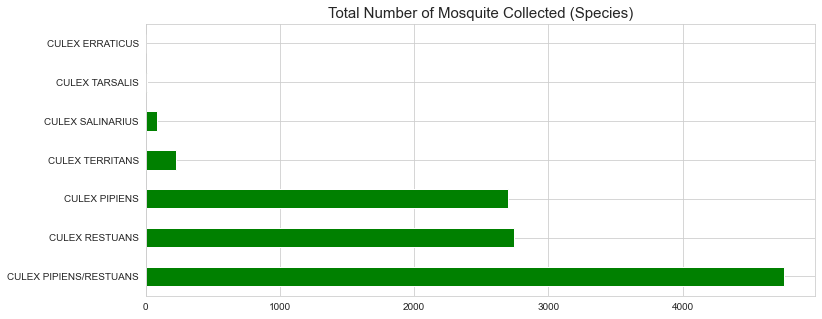

In [23]:
train['species'].value_counts().plot(kind = 'barh', color='Green', figsize=(12,5))
plt.title('Total Number of Mosquite Collected (Species)', fontsize=15);

##### There are a total of 7 species with culiex pipiens/restuans being the most.

In [24]:
# species and WNV count df
species_wnv = pd.DataFrame(train['species'].value_counts()).reset_index()

species_wnv = pd.merge(species_wnv, pd.DataFrame(train[train['wnvpresent']==1]['species'].value_counts()).reset_index(), how='left', on='index')

species_wnv.columns = ['species', 'num_observations', 'obs_w_wnv']

In [25]:
species_wnv

,species,num_observations,obs_w_wnv
0,CULEX PIPIENS/RESTUANS,4752,262.0
1,CULEX RESTUANS,2740,49.0
2,CULEX PIPIENS,2699,240.0
3,CULEX TERRITANS,222,NaN
4,CULEX SALINARIUS,86,NaN
5,CULEX TARSALIS,6,NaN
6,CULEX ERRATICUS,1,NaN


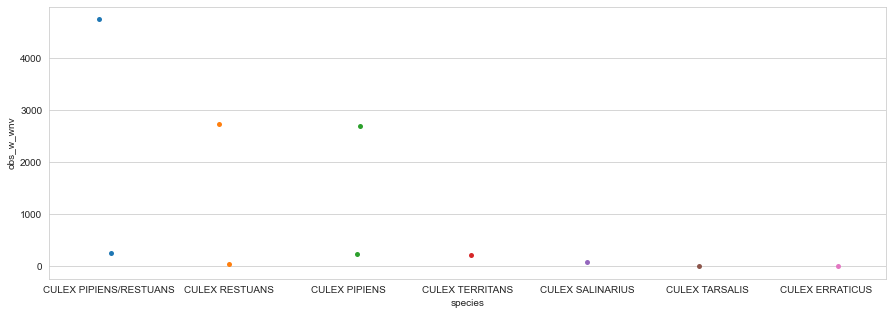

In [26]:
# consider deleting this
plt.figure(figsize=(15,5))
sns.stripplot(x="species", y="num_observations", data=species_wnv)
sns.stripplot(x="species", y="obs_w_wnv", data=species_wnv);

In [27]:
# train['Trap'].value_counts().plot(kind = 'hist')
# plt.tight_layout();

##### Unbalance data

In [28]:
train.wnvpresent.value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

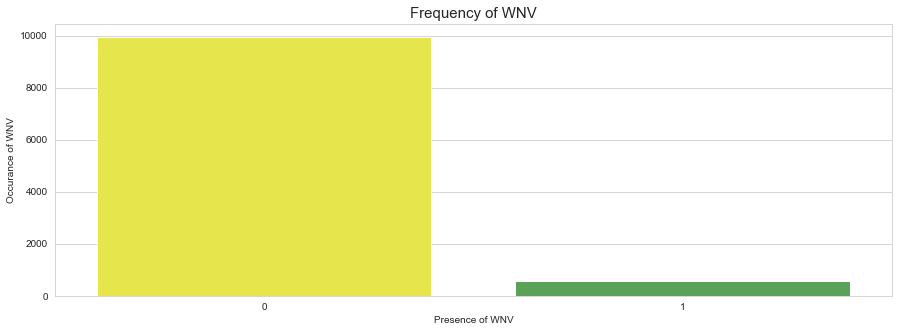

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="wnvpresent", palette='Set1_r', data=train)
plt.title('Frequency of WNV', fontsize=15)
plt.xlabel('Presence of WNV',fontsize=10)
plt.ylabel('Occurance of WNV',fontsize=10);

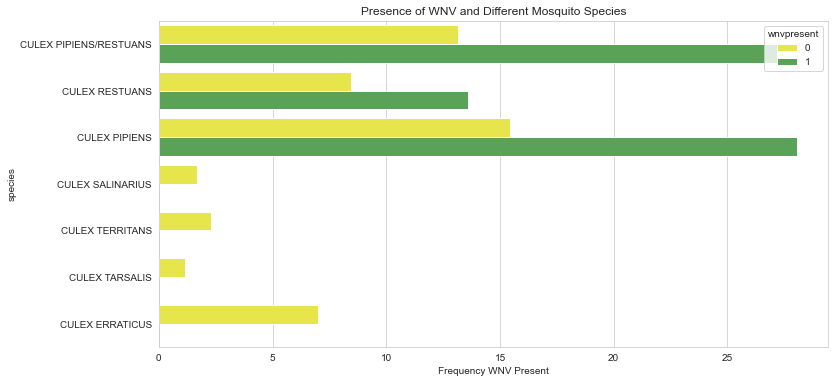

In [30]:
# Looking at the Frequency of MNV in difference mosquito species
plt.figure(figsize=(12,6))
sns.barplot(y='species', x='nummosquitos', hue='wnvpresent', data=train, palette='Set1_r', ci=None)
plt.title('Presence of WNV and Different Mosquito Species')
plt.xlabel('Frequency WNV Present');

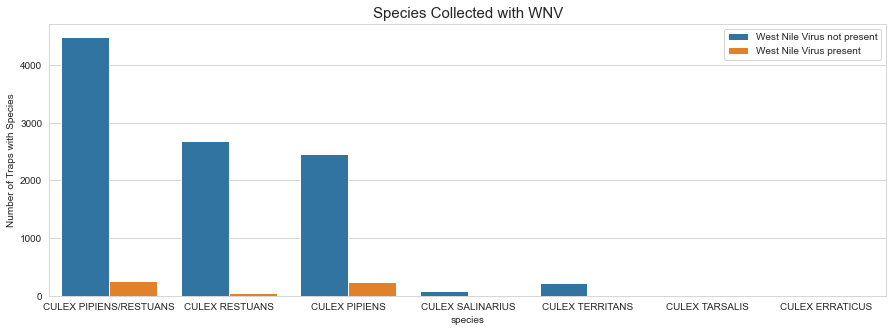

In [31]:
# duplicate of above
plt.figure(figsize=(15,5))
sns.countplot(x='species', hue='wnvpresent', data=train)
plt.xticks(rotation=0)
plt.legend(['West Nile Virus not present', 'West Nile Virus present'], loc=1)
plt.ylabel('Number of Traps with Species')
plt.title('Species Collected with WNV', fontsize=15);

In [32]:
train[train['wnvpresent'] == 1]['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS'],
      dtype=object)

##### WNV is only present in the following 3 species of Mosquitos (In train Dataset):
- CULEX PIPIENS/RESTUANS
- CULEX PIPIENS
- CULEX RESTUANS

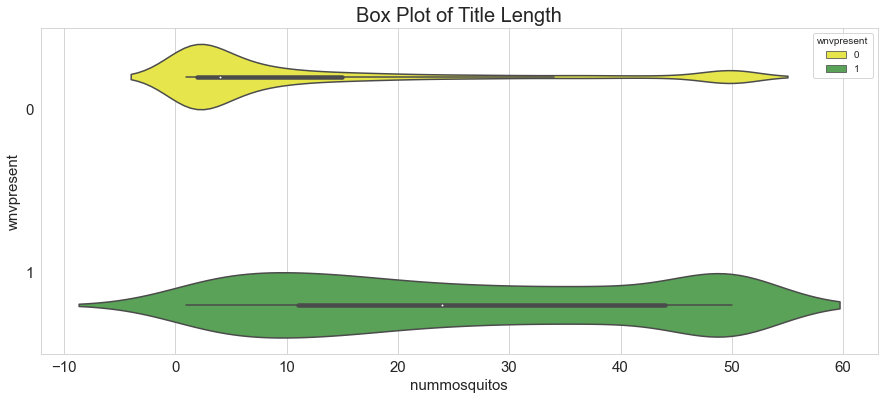

In [33]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.violinplot(y= 'wnvpresent', 
                    x='nummosquitos',
                    data=train, 
                    orient='h', 
                    hue='wnvpresent',
                    palette='Set1_r')

ax.set_title('Box Plot of Title Length',fontsize=20)
ax.set_xlabel("nummosquitos",fontsize=15)
ax.set_ylabel("wnvpresent",fontsize=15)
ax.tick_params(labelsize=15)

##### With WnvPresent==0, there is quite a number of outliers

## <span style='background :yellow' > Feature Engineering </span>

In [34]:
split_date(train)
split_date(test)
split_date(weather)
split_date(spray)

Text(0, 0.5, 'Average Number of Mosquitos in Trap')

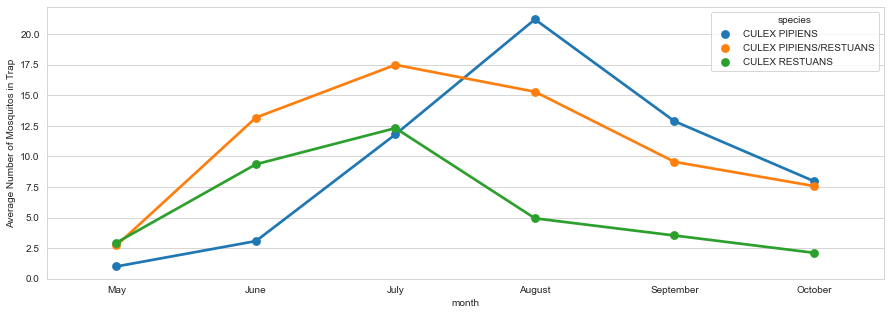

In [35]:
# add title
plt.figure(figsize=(15,5))
_ = sns.pointplot(x='month', y="nummosquitos", hue='species', data=train[train['species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])].groupby(['month', 'species'], as_index=False)['nummosquitos'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')
#plt.legend(['Culex Pipiens', 'Culex Pipiens/Restuans', 'Culex Restuans'])

In [36]:
# combining mosquitoes maxed at 50, total mosquitoes
train[train.nummosquitos == 50]
train.groupby(['date', 'trap', 'species'], as_index=False)['nummosquitos'].sum().sort_values('nummosquitos', ascending=False).head(15)

,date,trap,species,nummosquitos
1450,2007-08-16,T115,CULEX PIPIENS,2532
565,2007-07-25,T115,CULEX PIPIENS,2356
1901,2007-08-28,T115,CULEX PIPIENS,2207
1196,2007-08-08,T138,CULEX PIPIENS,1658
2055,2007-09-05,T115,CULEX PIPIENS,1648
1680,2007-08-22,T115,CULEX PIPIENS,1554
847,2007-08-01,T115,CULEX PIPIENS,1543
3197,2009-06-22,T900,CULEX PIPIENS/RESTUANS,1520
1191,2007-08-08,T115,CULEX PIPIENS,1310
1686,2007-08-22,T138,CULEX PIPIENS,1054


In [37]:
#merging total mosquitoes with train 
train = pd.merge(train, train.groupby(['date', 'trap', 'species'], as_index=False)['nummosquitos'].sum(), how='left', on=['date', 'trap', 'species'])
train.columns = ['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'total_mos']

In [38]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,total_mos
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,1
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,1
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,1
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,4


***

In [40]:
rate = train.groupby(['addressnumberandstreet', 'trap'], as_index=False)['wnvpresent', 'nummosquitos'].sum().sort_values('wnvpresent')

In [43]:
rate.tail()

,addressnumberandstreet,trap,wnvpresent,nummosquitos
79,"4600 N MILWAUKEE AVE, Chicago, IL",T003,14,1346
4,"1000 S STONY ISLAND AVE, Chicago, IL",T138,16,9936
72,"4100 N OAK PARK AVE, Chicago, IL",T002,18,3710
18,"1200 S DOTY AVE, Chicago, IL",T115,41,21668
7,"1000 W OHARE AIRPORT, Chicago, IL",T900,66,15386


In [44]:
rate['rate_virus'] = rate['wnvpresent']/rate['nummosquitos']

In [45]:

rate.sort_values('wnvpresent', ascending=False).head(10)

,addressnumberandstreet,trap,wnvpresent,nummosquitos,rate_virus
7,"1000 W OHARE AIRPORT, Chicago, IL",T900,66,15386,0.004290
18,"1200 S DOTY AVE, Chicago, IL",T115,41,21668,0.001892
72,"4100 N OAK PARK AVE, Chicago, IL",T002,18,3710,0.004852
4,"1000 S STONY ISLAND AVE, Chicago, IL",T138,16,9936,0.001610
79,"4600 N MILWAUKEE AVE, Chicago, IL",T003,14,1346,0.010401
128,"8200 S KOSTNER AVE, Chicago, IL",T225,11,2014,0.005462
60,"3600 N PITTSBURGH AVE, Chicago, IL",T011,11,1311,0.008391
45,"2400 E 105TH ST, Chicago, IL",T128,11,3315,0.003318
115,"7000 N MOSELL AVE, Chicago, IL",T008,10,2668,0.003748
8,"1000 W OHARE, Chicago, IL",T903,10,2327,0.004297


In [47]:
rate.sort_values('rate_virus', ascending=False).head(25)

,addressnumberandstreet,trap,wnvpresent,nummosquitos,rate_virus
99,"6000 W ROSCOE ST, Chicago, IL",T005,2,50,0.040000
97,"6000 N AVONDALE AVE, Chicago, IL",T006,4,107,0.037383
109,"6500 N OAK PARK AVE, Chicago, IL",T143,6,230,0.026087
123,"7900 W FOSTER AVE, Chicago, IL",T015,4,169,0.023669
125,"8100 E 91ST ST, Chicago, IL",T107,2,86,0.023256
89,"5200 S NORDICA, Chicago, IL",T070,2,90,0.022222
75,"4200 W 31ST ST, Chicago, IL",T036,1,52,0.019231
69,"4000 N AUSTIN AVE, Chicago, IL",T142,1,58,0.017241
111,"6600 S KILPATRICK AVE, Chicago, IL",T156,1,61,0.016393
71,"4000 S DEARBORN ST, Chicago, IL",T081,3,207,0.014493


Text(0.5, 1.0, 'Average Mosquitoes in Trap by Month and Year')

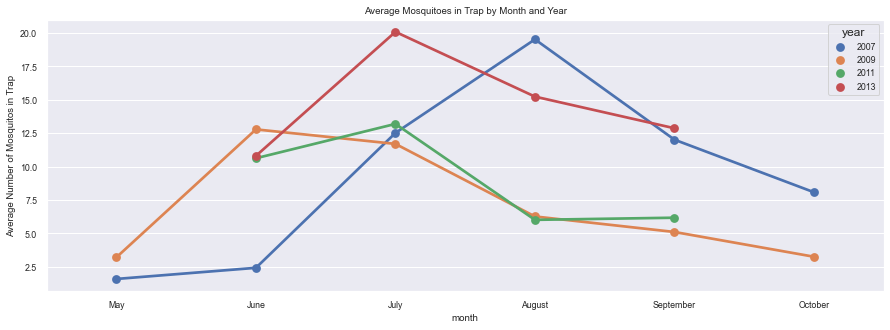

In [70]:
# plot Average Mosquitoes in Trap by Month and Year
plt.figure(figsize=(15,5))
_ = sns.pointplot(x='month', y="nummosquitos", hue="year", data=train.groupby(['year', 'month'], as_index=False)['nummosquitos'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')
plt.title('Average Mosquitoes in Trap by Month and Year');

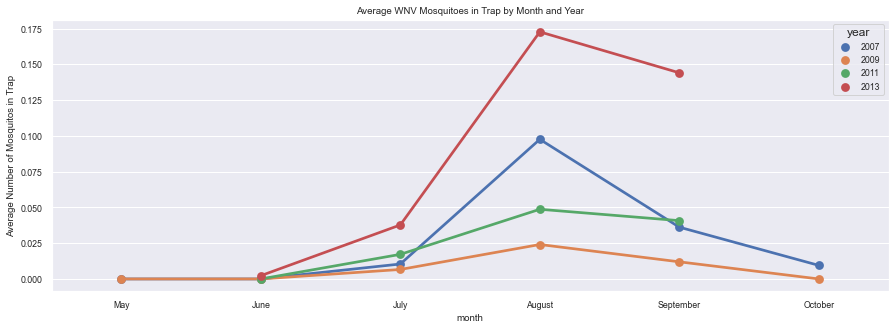

In [69]:
# plot Average WNV Mosquitoes in Trap by Month and Year
plt.figure(figsize=(15,5))
_ = sns.pointplot(x='month', y="wnvpresent", hue="year", data=train.groupby(['year', 'month'], as_index=False)['wnvpresent'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')
plt.title('Average WNV Mosquitoes in Trap by Month and Year');

In [55]:
# number of traps set by year
train.groupby('year')['trap'].count()

year
2007    3811
2009    2249
2011    2054
2013    2392
Name: trap, dtype: int64

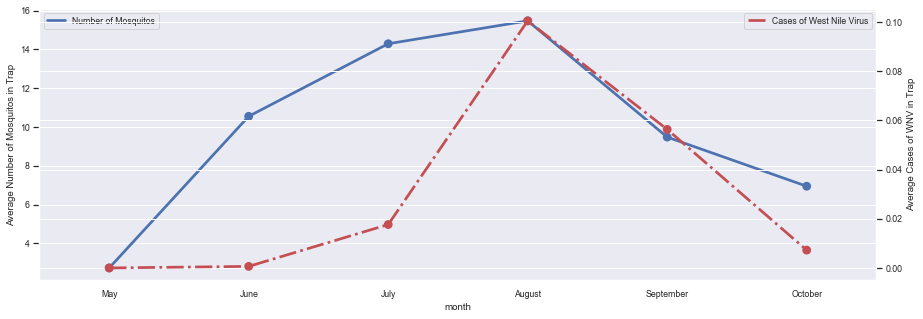

In [67]:
sns.set(font_scale=0.8)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1 = sns.pointplot(x='month', y="nummosquitos", data=train.groupby(['month'], as_index=False)['nummosquitos'].mean(),)
plt.ylabel('Average Number of Mosquitos in Trap')
plt.legend(['Number of Mosquitos'], loc=2)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='month', y="wnvpresent", linestyles='-.', color='r', data=train.groupby(['month'], as_index=False)['wnvpresent'].mean(),)
ax1.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')
plt.legend(['Cases of West Nile Virus'], loc=1);

***

In [ ]:
# split up species
# def dummify_species (data):
#     #Convert Date column to Date time object
#     data['species'] = pd.get_dummies(data, columns = ['species'])   
#     return

In [ ]:
# dummify_species(train)
# dummify_species(test)

## after this point: full pasting of data from 
https://github.com/dale-wahl/West-Nile-Virus/blob/master/EDA-West%20Nile%20Virus%20-%20Dale.ipynb

## WEATHER ED
Aweather EDA needs a cleaned up data set - skipping first

In [84]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2,2007,5
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6,2007,5
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4,2007,5
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4,2007,5
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9,2007,5


In [ ]:
drop depart
drop heat cool sunrise sunset, depth water1
add lat long 

Station 1:  Lat: 41.995 Lon: -87.933 
Station 2:  Lat: 41.786 Lon: -87.752 

In [71]:

# We need to create one line per date:
station1 = weather[weather['station']==1]
station2 = weather[weather['station']==2]
station1 = station1.drop('station', axis=1)
station2 = station2.drop('station', axis=1)

In [77]:
station2.columns

Index(['date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'sunrise', 'sunset', 'codesum', 'depth', 'water1', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'year', 'month'],
      dtype='object')

In [ ]:
station1.columns = ['date', 'st1_tmax', 'st1_tmin', 'st1_tavg', 'st1_dewpoint', 'st1_wetbulb', 'st1_codesum',
       'st1_snowfall', 'st1_preciptotal', 'st1_stnpressure', 'st1_sealevel', 'st1_resultspeed',
       'st1_resultdir', 'st1_avgspeed', 'st1_year', 'st1_month']
station2.columns = ['date', 'st2_tmax', 'st2_tmin', 'st2_tavg', 'st2_dewpoint', 'st2_wetbulb', 'st2_codesum',
       'st2_snowfall', 'st2_preciptotal', 'st2_stnpressure', 'st2_sealevel', 'st2_resultspeed',
       'st2_resultdir', 'st2_avgspeed', 'st2_year', 'st2_month']

In [ ]:
train = pd.merge(train, weather, how='left', on='Date')

****

## SPRAY EDA


In [ ]:

final_df = pd.get_dummies(train, columns=['Species'])

In [ ]:
#our two origins (the locations with the most WNV activity) are Chicago O'Hare and Doty Ave.
#the following values are their latitudes and longitudes
ohare_lon = -87.890615
ohare_lat = 41.974689
doty_lon =-87.599862
doty_lat=41.673408

In [ ]:
lat = train.Latitude
lon = train.Longitude


In [ ]:

#haversine takes two lat and longs and creates a distance, from the mean, in miles
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    mi = 3956   * c #Radius of earth in miles. Use 6367 for kilometers
    return mi, dlon, dlat

In [ ]:

#apply haversine function to training dataset, creating a column called 'dist_from_ohare_MI'
final_df['dist_from_ohare_MI'] = [haversine(y, x, ohare_lon, ohare_lat)[0] for y, x in zip(lon, lat)]
#apply haversine function to training dataset, creating a column called 'dist_from_doty_MI'
final_df['dist_from_doty_MI'] = [haversine(y, x, doty_lon, doty_lat)[0] for y, x in zip(lon, lat)]

In [80]:
# Get a lat and long for each trap
trap_locs = train.groupby(['trap'], as_index=False)['latitude', 'longitude'].mean().dropna().reset_index().drop('index', 1)

In [82]:
trap_locs.head()

,trap,latitude,longitude
0,T001,41.953705,-87.733974
1,T002,41.954690,-87.800991
2,T003,41.964242,-87.757639
3,T004,41.962728,-87.748367
4,T005,41.942114,-87.776385


In [83]:
trap_name = np.array(trap_locs.trap)
trap_lat = np.array(trap_locs.latitude)
trap_lon = np.array(trap_locs.longitude)

In [ ]:
# this should go through each trap and check to see if the spray truck is close
def check_traps(row):
    distance = [haversine(lon1=row['longitude'], lat1=row['Latitude'], lon2=trap_lon[i], lat2=trap_lat[i])[0] for i in range(len(trap_name))]
    for a, b in enumerate(distance):
        if b < 1:
            spray.set_value(row.name,trap_name[a],1)
            break 
        else:
            spray.set_value(row.name,trap_name[a],0)

In [ ]:
# create groupby on days and note if the truck was within a mile
spray_days = spray.groupby('Date', as_index=False)[trap_name].max()

In [ ]:
spray.Date.unique()

In [ ]:
spray_days

In [ ]:
from datetime import timedelta
spray_weeks = []
for i in spray.Date.unique():
    spray_weeks.append([pd.to_datetime(i) + timedelta(days=a) for a in range(1,15)])

In [ ]:
final_df[final_df['Date']=='2011-09-01'].head()

In [ ]:

final_df['sprayed_14days'] = 0
def spray_truck(row):
    for num, i in enumerate(spray_weeks):
        if row['Date'] not in i:
            continue
        else:
            if spray_days.iloc[num][row['Trap']] == 1:
                return 1
            else:
                continue

In [ ]:

final_df['sprayed_14days'] = final_df.apply(spray_truck, axis=1)

In [ ]:
final_df['sprayed_14days'] = final_df['sprayed_14days'].fillna(0)
final_df['sprayed_14days'].value_counts()

In [ ]:
#Spray was not a good predictor for WNV, but maybe mosquitoes?

In [ ]:
# These are the days we're looking at:
spray.Date.unique()

In [ ]:

mosquitoes = train.groupby(['Date', 'Trap'], as_index=False)['NumMosquitos'].sum().dropna()

In [ ]:
mosquitoes['sprayed_14days'] = mosquitoes.apply(spray_truck, axis=1).fillna(0)

In [ ]:
# These two traps were sprayed in 2011
mosquitoes[(mosquitoes['Date'] > '2011') & (mosquitoes['Date'] < '2012') & (mosquitoes['sprayed_14days']==1)]
# T002 & T233

In [ ]:
mosquitoes2011 = mosquitoes[(mosquitoes['Date'] > '2011') & (mosquitoes['Date'] < '2012')]

In [ ]:
# Averages in all other traps; unfortunately it is hard to compare one trap to another
mosquitoes2011[(mosquitoes2011['Trap'] != 'T002') | (mosquitoes2011['Trap'] != 'T233')].groupby('Date')['NumMosquitos'].mean()

In [ ]:

#Averages of the two sprayed traps
mosquitoes2011[(mosquitoes2011['Trap'] == 'T002') | (mosquitoes2011['Trap'] == 'T233')].groupby('Date')['NumMosquitos'].mean()

In [ ]:

mosquitoes[(mosquitoes['Date'] > '2011') & (mosquitoes['Date'] < '2012') & (mosquitoes['Trap']=='T223')]

In [ ]:
#traps spreadyed in 2013
sprayed_2013=list(mosquitoes[(mosquitoes['Date'] > '2013') & (mosquitoes['Date'] < '2014') & (mosquitoes['sprayed_14days']==1)]['Trap'].unique())

In [ ]:
mosquitoes2013 = mosquitoes[(mosquitoes['Date'] > '2013') & (mosquitoes['Date'] < '2014')]

In [ ]:

spray.Date.unique()[2:]

In [ ]:
unsprayed_traps_2013 = mosquitoes2013[mosquitoes2013['Trap'].isin(sprayed_2013)].groupby('Date')['NumMosquitos'].mean()
unsprayed_traps_2013

In [ ]:
sprayed_traps_2013 = mosquitoes2013[~mosquitoes2013['Trap'].isin(sprayed_2013)].groupby('Date')['NumMosquitos'].mean()
sprayed_traps_2013

In [ ]:
after_sprays = unsprayed_traps_2013.copy()
for i in range(len(after_sprays)):
    after_sprays[i]=0
after_sprays[7] = 50
after_sprays[8] = 50
after_sprays[10] = 50
after_sprays[12] = 50
after_sprays[13] = 50
after_sprays[14] = 50

In [ ]:
after_sprays[[7,8,10,12,13,14]]

In [ ]:
fig, ax = plt.subplots()
import matplotlib.lines as mlines
sns.pointplot(unsprayed_traps_2013.index, unsprayed_traps_2013.values, color='blue')
sns.pointplot(sprayed_traps_2013.index, sprayed_traps_2013.values, color='r')
sns.pointplot(after_sprays.index, after_sprays.values, linestyles='', color='black')

plt.xticks(rotation=45)
blue_line = mlines.Line2D([],[],color='blue', label='Unsprayed Traps')
red_line = mlines.Line2D([],[],color='red', label='Sprayed Traps')
black_line = mlines.Line2D([],[],color='black', label='Spray Days')
plt.ylabel('Average Mosquitos in Trap')
plt.legend(handles=[blue_line, red_line, black_line])

In [ ]:
print(list(final_df.columns))

## Test Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df_train, df_test = train_test_split(final_df.drop(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'NumMosquitos', 'st1_CodeSum', 'st2_CodeSum'], 1), test_size=0.3, random_state=42)

In [ ]:
test_features = final_df[['sprayed_14days', 'Latitude', 'Longitude', 'WnvPresent', 'st1_Tmax', 'st1_Tmin', 'st1_Tavg', 'st1_DewPoint', 'st1_WetBulb', 'st1_SnowFall', 'st1_PrecipTotal', 'st1_StnPressure', 'st1_SeaLevel', 'st1_ResultSpeed', 'st1_ResultDir', 'st1_AvgSpeed', 'st2_Tmax', 'st2_Tmin', 'st2_Tavg', 'st2_DewPoint', 'st2_WetBulb', 'st2_SnowFall', 'st2_PrecipTotal', 'st2_StnPressure', 'st2_SeaLevel', 'st2_ResultSpeed', 'st2_ResultDir', 'st2_AvgSpeed', 'precip_avg', '2wk_precip', '4wk_precip', '90day_precip', 'temp_avg', '2wk_tavg', '4wk_tavg', '90day_tavg', 'tempmin_avg', '2wk_mintemp', '4wk_mintemp', 'dew_avg', '2wk_dew', '4wk_dew', 'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Month', 'Day', 'dist_from_ohare_MI', 'dist_from_doty_MI']]

In [ ]:

df_train, df_test = train_test_split(test_features, test_size=0.3, random_state=42)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

def eval_sklearn_model(y_true, predictions, model=None, X=None):
    """This function takes the true values for y and the predictions made by the model and prints out the confusion matrix along with Accuracy, Precision, and, if model and X provided, Roc_Auc Scores."""
    cnf_matrix = confusion_matrix(y_true, predictions)

    print('True Negative: ', cnf_matrix[0, 0], '| False Positive: ', cnf_matrix[0, 1])
    print('False Negative: ', cnf_matrix[1, 0], '| True Positive: ', cnf_matrix[1, 1], '\n')

    sensitivity = cnf_matrix[1, 1]/ (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    specificity = cnf_matrix[0, 0]/ (cnf_matrix[0, 1] + cnf_matrix[0, 0])

    print('Sensitivity (TP/ TP + FN): ', sensitivity)
    print('Specificity (TN/ TN + FP): ', specificity, '\n')

    print('Accuracy: ', accuracy_score(y_true, predictions, normalize=True))
    print('Precision: ', precision_score(y_true, predictions))
    if model != None:
        print('Roc-Auc: ', roc_auc_score(y_true, [x[1] for x in model.predict_proba(X)]))
    else:
        pass
    print('\n')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
df_train.WnvPresent.value_counts()

In [ ]:

xgb = XGBClassifier(scale_pos_weight=(6969/385), objective='binary:logistic')
# make sure to pick the correct objective for the problem
# scale_pos_weight is supposed to help with unbalanced classes; it recommended number of negative cases divided by positive
xgb.fit(df_train.drop('WnvPresent', 1), df_train.WnvPresent)

In [ ]:
test_predictions = xgb.predict(df_test.drop('WnvPresent', 1))
eval_sklearn_model(df_test.WnvPresent, test_predictions)

In [ ]:
feature_import = xgb.feature_importances_

In [ ]:

features = df_test.drop('WnvPresent', 1).columns

In [ ]:
pd.set_option('display.max_rows',60)

In [ ]:
pd.DataFrame(columns=['feature', 'import'], data=list(zip(features, feature_import))).sort_values('import',ascending=False)

In [ ]:

# Run on full data
final_df.WnvPresent.value_counts()

In [ ]:

xgb = XGBClassifier(scale_pos_weight=(9955/551), objective='binary:logistic')
xgb.fit(test_features.drop('WnvPresent', 1), test_features.WnvPresent)

## Prep test

In [ ]:
test["Date"] = pd.to_datetime(test["Date"], infer_datetime_format=True)

In [ ]:
test['Address'] = test['Address'].astype('category')
test['Species'] = test['Species'].astype('category')
test['Street'] = test['Street'].astype('category')
test['Trap'] = test['Trap'].astype('category')
test['AddressNumberAndStreet'] = test['AddressNumberAndStreet'].astype('category')

In [ ]:

test = pd.merge(test, weather, how='left', on='Date')

In [ ]:

test = pd.get_dummies(test, columns=['Species'])

In [ ]:
test['Month'] = test['Date'].dt.month
test["Day"] = test['Date'].dt.dayofyear

In [ ]:
lat = test.Latitude
lon = test.Longitude

In [ ]:
#apply haversine function to training dataset, creating a column called 'dist_from_ohare_MI'
test['dist_from_ohare_MI'] = [haversine(y, x, ohare_lon, ohare_lat)[0] for y, x in zip(lon, lat)]
#apply haversine function to training dataset, creating a column called 'dist_from_doty_MI'
test['dist_from_doty_MI'] = [haversine(y, x, doty_lon, doty_lat)[0] for y, x in zip(lon, lat)]

In [ ]:
#predictions = xgb.predict(test.drop(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'st1_CodeSum', 'st2_CodeSum'], 1))
# ValueError: test data apparently has more damn columns!

In [ ]:
test.drop(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'st1_CodeSum', 'st2_CodeSum'], 1).shape
# 6 more columns!

In [ ]:

for i in test.columns:
    if i in final_df.columns:
        pass
    else:
        print(i)

In [ ]:
pred_features = test[['Latitude', 'Longitude', 'st1_Tmax', 'st1_Tmin', 'st1_Tavg', 'st1_DewPoint', 'st1_WetBulb', 'st1_SnowFall', 'st1_PrecipTotal', 'st1_StnPressure', 'st1_SeaLevel', 'st1_ResultSpeed', 'st1_ResultDir', 'st1_AvgSpeed', 'st2_Tmax', 'st2_Tmin', 'st2_Tavg', 'st2_DewPoint', 'st2_WetBulb', 'st2_SnowFall', 'st2_PrecipTotal', 'st2_StnPressure', 'st2_SeaLevel', 'st2_ResultSpeed', 'st2_ResultDir', 'st2_AvgSpeed', 'precip_avg', '2wk_precip', '4wk_precip', '90day_precip', 'temp_avg', '2wk_tavg', '4wk_tavg', '90day_tavg', 'tempmin_avg', '2wk_mintemp', '4wk_mintemp', 'dew_avg', '2wk_dew', '4wk_dew', 'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Month', 'Day', 'dist_from_ohare_MI', 'dist_from_doty_MI']]

In [ ]:
# fuck it, drop them and sort it later!
predictions = xgb.predict(pred_features)

In [ ]:
submission = pd.DataFrame(columns=['Id', 'WnvPresent'], data=list(zip(test.Id, predictions)))